In [1]:
# This is a continuation of our shop project, which I previously cleaned, and we will now gain some insight into the data.

In [2]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_rawdata = pd.read_excel('shopcleaned.xlsx')

In [4]:
df = df_rawdata.copy()

In [5]:
pd.set_option('display.max_rows',None)

In [6]:
df.head()

,Unnamed: 0,ORDER_ID,CUSTOMER_NAME,CUSTOMER_ID,COOKIES_SHIPPED,REVENUE,COST,ORDER_DATE,SHIP_DATE,ORDER_STATUS
0,0,413383,YT Restaurants,152689,936,4680,2340.0,2017-12-31,2018-01-05,Shipped
1,1,751142,Quick Bite Convenience Stores,985245,987,4935,2467.5,2017-12-31,2018-01-04,Shipped
2,2,876056,Quick Bite Convenience Stores,985245,270,1350,675.0,2017-12-30,2018-01-03,Shipped
3,3,548247,Quick Bite Convenience Stores,985245,925,4625,2312.5,2017-12-30,2018-01-03,Shipped
4,4,626350,YT Restaurants,152689,974,4870,2435.0,2017-12-29,2018-01-03,Shipped


In [7]:
# for no apparent reason, I'm not sure how the unnamed column above appeared to be there given that I had already cleaned the data and removed it.
 all unidentified columns before

In [8]:
df = df.drop('Unnamed: 0',axis = 1)

In [9]:
# Using the data set, we can calculate the profit for each shipment.

In [10]:
df['PROFIT'] =  df['REVENUE']-df['COST']

In [11]:
# I wanted to get the months too but we don't have any order that is one month and above and below is the formula to confirm it.
# However, when you use the formula below, some data might give you 1 for the month becuse it counts each month in days.

In [12]:
#df['Total Month']=((df['Ship Date'].dt.year - df['Order Date'].dt.year)*12)+ (df['Ship Date'].dt.month - df['Order Date'].dt.month)


In [13]:
# Total days it took before the order was shipped

In [14]:
df['TOTAL_DAYS'] = df['SHIP_DATE']- df['ORDER_DATE']

In [15]:
df.head(3)

,ORDER_ID,CUSTOMER_NAME,CUSTOMER_ID,COOKIES_SHIPPED,REVENUE,COST,ORDER_DATE,SHIP_DATE,ORDER_STATUS,PROFIT,TOTAL_DAYS
0,413383,YT Restaurants,152689,936,4680,2340.0,2017-12-31,2018-01-05,Shipped,2340.0,5 days
1,751142,Quick Bite Convenience Stores,985245,987,4935,2467.5,2017-12-31,2018-01-04,Shipped,2467.5,4 days
2,876056,Quick Bite Convenience Stores,985245,270,1350,675.0,2017-12-30,2018-01-03,Shipped,675.0,4 days


In [16]:
# checking the correlation to see the relationships and 'cookies_shipped' seems to have a high correlation with the other data

In [17]:
df.corr()

,ORDER_ID,CUSTOMER_ID,COOKIES_SHIPPED,REVENUE,COST,PROFIT
ORDER_ID,1.000000,0.013501,-0.064835,-0.064835,-0.064835,-0.064835
CUSTOMER_ID,0.013501,1.000000,-0.055464,-0.055464,-0.055464,-0.055464
COOKIES_SHIPPED,-0.064835,-0.055464,1.000000,1.000000,1.000000,1.000000
REVENUE,-0.064835,-0.055464,1.000000,1.000000,1.000000,1.000000
COST,-0.064835,-0.055464,1.000000,1.000000,1.000000,1.000000
PROFIT,-0.064835,-0.055464,1.000000,1.000000,1.000000,1.000000


In [18]:
# this shows the total cost,Revenue,profit,and quantity of cookies shipped to each customer. Cascade Grovers generated the 
# highest profit

In [19]:
df.groupby('CUSTOMER_NAME')[['COST','REVENUE','PROFIT','COOKIES_SHIPPED']].apply(pd.Series.sum)

,COST,REVENUE,PROFIT,COOKIES_SHIPPED
CUSTOMER_NAME,,,,
Acme Grocery Stores,72667.5,145335.0,72667.5,29067.0
Cascade Grovers,305955.0,611910.0,305955.0,122382.0
Park & Eat LLC,176397.5,352795.0,176397.5,70559.0
Quick Bite Convenience Stores,239610.0,479220.0,239610.0,95844.0
YT Restaurants,223840.0,447680.0,223840.0,89536.0


In [20]:
# plot graph to show the relationship between Cost and Revenue

In [21]:
x = df['COST']
y = df['REVENUE']

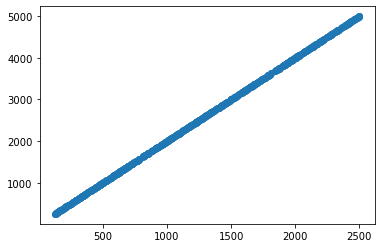

In [22]:
plt.scatter(x,y)
plt.show()

In [23]:
df.to_excel('shop4model.xlsx')

In [24]:
# For my next project, I plan to create a model that predicts revenue based on a given amount of cost.